<a href="https://colab.research.google.com/github/gerardcalabrese/HCSPD2024/blob/main/Ejercicio_04_Caso_Simbolico_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cálculo simbólico en Python**

---

## **Linealización en el equilibrio inestable**

Para el caso de la linealización de sistemas dinámicos, como el péndulo en su equilibrio inestable, se puede linealizar aplicando Taylor a las ecuaciones


<!-- $(M+m)\cdot\ddot{\delta} = u- m\cdot long \cdot \ddot{\phi} + m\cdot long \cdot \dot{\phi}^2 \cdot \phi -Fricc\cdot \dot{\delta}$,
$Long \cdot \ddot{\phi} = g \cdot \phi - \ddot{\delta}$ -->
$\begin{equation*}
\begin{cases}
(M+m)\cdot\ddot{\delta} = u- m\cdot long \cdot \ddot{\phi} + m\cdot long \cdot \dot{\phi}^2 \cdot \phi -Fricc\cdot \dot{\delta} \\
Long \cdot \ddot{\phi} = g \cdot \phi - \ddot{\delta}
\end{cases}
\end{equation*}$

en el punto de operación $x=[ \delta,\dot{\delta},\phi,\dot{\phi}]^T$, valuado en $[0,0,0,0]^T$.
Primero se trata de despejar las funciones $\ddot{\delta}$ y $\ddot{\phi}$.


In [1]:
# Importo los paquetes que voy a usar en este cuaderno.
from sympy import *
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#Detallo las ecuaciones a resolver y las llamo Eq1 y Eq2
init_printing(use_unicode=True)
#declaro las variables simbólicas
fi, fi_p, fi_pp, p, p_p, p_pp, M, m, u, long, Fricc, g=symbols('fi fi_p fi_pp p p_p p_pp M m u long Fricc g')
# p_pp=(1/(M+m))*(u-m*long*fi_pp+m*long*fi_p**2*fi-Fricc*p_p) #; %Pequeños angulos
Eq1=Eq(p_pp-(1/(M+m))*(u-m*long*fi_pp+m*long*fi_p**2*fi-Fricc*p_p),0)
#% fi_pp=(1/long)*(g*(fi)-p_pp); %Pequeños angulos para fi~0, sin(fi)~fi, cos(fi)~1
Eq2=Eq(fi_pp-(1/long)*(g*fi-p_pp),0)

# Utilizo esta función de paquete sympy para resolver simbolicamente el sistema
sol = solve((Eq1, Eq2),(p_pp, fi_pp))

# Asigno cada una de las ecuaciones despejadas
p_pp=sol[p_pp]
fi_pp=sol[fi_pp]

#Muestro en la consola los resultados
print('\np_pp es: \n')
display(p_pp)
print('\nfi_pp es: \n')
display(fi_pp)


p_pp es: 



                  2                    
-Fricc⋅pₚ + fi⋅fiₚ ⋅long⋅m - fi⋅g⋅m + u
───────────────────────────────────────
                   M                   


fi_pp es: 



                          2                    
Fricc⋅pₚ + M⋅fi⋅g - fi⋅fiₚ ⋅long⋅m + fi⋅g⋅m - u
───────────────────────────────────────────────
                     M⋅long                    

Así, para el equilibrio inestable, ambas funciones son:

$\begin{equation*}
\begin{cases}
\ddot{\delta} = \dfrac{-Fricc \cdot \dot{\delta}+\phi \cdot {\dot{\delta}}^2\cdot long\cdot m -\phi\cdot g\cdot m+u}{M} \\
\ddot{\phi} = \dfrac{Fricc \cdot \dot{\delta}+M \cdot \phi \cdot g- \phi \cdot{\dot{\phi}}^2\cdot long\cdot m + \phi\cdot g\cdot m-u}{M\cdot long}
\end{cases}
\end{equation*}$
<!--
p_pp=
                      2                    
  -Fricc⋅p_p + fi⋅fi_p ⋅long⋅m - fi⋅g⋅m + u
  ─────────────────────────────────────────
                      M                    
fi_pp=
                              2                    
  Fricc⋅p_p + M⋅fi⋅g - fi⋅fi_p ⋅long⋅m + fi⋅g⋅m - u
  ─────────────────────────────────────────────────
                        M⋅long                             -->

Ahora se procede a realizar las derivadas de las funciones $\ddot{\delta}$ y $\ddot{\phi}$ respecto de las cuatro variables, que son $\delta$, $\dot{\delta}$, $\phi$, y $\ddot{\phi}$.
Se emplea la función diff() y al resultado se lo valúa en el punto de operación mediante la indicación de cada uno con la operación .subs().

In [3]:
# Dentro del metodo subs puedo remplazar varias variables a la vez al ingresar
# un dic con los nombres de varible como key y los valores como values

# Utilizo la función "Matrix" del paquete sympy para definir que es una matriz
# simbolica

# Esto responde a la variable de estado X = [delta, phi, delta_p, phi_p]

Mat_A=Matrix([[0,1,0,0],
  [diff(p_pp, p).subs({p:0,p_p:0,fi:0,fi_p:0}),
  diff(p_pp, p_p).subs({p:0,p_p:0,fi:0,fi_p:0}),
  diff(p_pp, fi).subs({p:0,p_p:0,fi:0,fi_p:0}),
  diff(p_pp, fi_p).subs({p:0,p_p:0,fi:0,fi_p:0})],
  [0,0,0,1],
  [diff(fi_pp, p).subs({p:0,p_p:0,fi:0,fi_p:0}),
  diff(fi_pp, p_p).subs({p:0,p_p:0,fi:0,fi_p:0}),
  diff(fi_pp, fi).subs({p:0,p_p:0,fi:0,fi_p:0}),
  diff(fi_pp, fi_p).subs({p:0,p_p:0,fi:0,fi_p:0})]])

Mat_B=Matrix([[0],
 [diff(p_pp, u).subs({p:0,p_p:0,fi:0,fi_p:0})],
 [0],
[diff(fi_pp, u).subs({p:0,p_p:0,fi:0,fi_p:0})]])

#Muestro los resultados en la consola
print('\n Matriz de estado A: Mat_A= \n')
display(Mat_A)

print('\n Matriz de estado B: Mat_B = \n')
display(Mat_B)


 Matriz de estado A: Mat_A= 



⎡0     1         0      0⎤
⎢                        ⎥
⎢   -Fricc     -g⋅m      ⎥
⎢0  ───────    ─────    0⎥
⎢      M         M       ⎥
⎢                        ⎥
⎢0     0         0      1⎥
⎢                        ⎥
⎢   Fricc    M⋅g + g⋅m   ⎥
⎢0  ──────   ─────────  0⎥
⎣   M⋅long     M⋅long    ⎦


 Matriz de estado B: Mat_B = 



⎡  0   ⎤
⎢      ⎥
⎢  1   ⎥
⎢  ─   ⎥
⎢  M   ⎥
⎢      ⎥
⎢  0   ⎥
⎢      ⎥
⎢ -1   ⎥
⎢──────⎥
⎣M⋅long⎦

In [4]:
# Defino los parametros de entrada para el problema

# No se debe declarar las asignaciones. Si se declaran, lo que era considerado
# simbolico al momento de resolver la matriz ya no lo será y hace que al
#remplazar el valor mediante el método subs en la matriz no genere ningun cambio

#m=.1;Fricc=0.1; long=.6;g=9.8;M=.5

# Remplazo los valores en cada matriz de estado

Mat_a = Mat_A.subs({m:.1,Fricc:0.1, long:.6,g:9.8,M:.5})
Mat_b = Mat_B.subs({m:.1,Fricc:0.1, long:.6,g:9.8,M:.5})

# Muestro en la consola las matrices
print('\n Matriz A: \n')
display(Mat_a)
print('\n Matriz B: \n')
display(Mat_b)



 Matriz A: 



⎡0          1            0    0⎤
⎢                              ⎥
⎢0        -0.2         -1.96  0⎥
⎢                              ⎥
⎢0          0            0    1⎥
⎢                              ⎥
⎣0  0.333333333333333  19.6   0⎦


 Matriz B: 



⎡        0        ⎤
⎢                 ⎥
⎢       2.0       ⎥
⎢                 ⎥
⎢        0        ⎥
⎢                 ⎥
⎣-3.33333333333333⎦

Se requiere verificar el correcto desempeño de la linealización hecha mediante la simulación numérica mediante Euler.

**Simulación** del Péndulo con Python.
A continuación se muestra el resultado.


# **Verificación numérica y visualización gráfica**

# **Simulación numérica para el equilibrio inestable**



In [5]:
# Combierto las matrices de estado desde el tipo simbolico a numpy array.
# se debe implementar el método "astype" y definir que se quiere que los números
# sean flotantes. De otra manera tratara a la matriz como objeto.

A = np.array(Mat_a).astype(np.float64)
B = np.array(Mat_b).astype(np.float64)

In [67]:
del (X,Xp) # borro las variables de estado que puedan existir
#Paso de simulación
h=10e-4;
# Tiempo de simulación
t_simul=0.1; #Tiene que ser muy pequeño para que se vea que coinciden

##%Versión linealizada en el equilibrio inestable. Sontag Pp 104.
# Matrices de estado

# Combierto las matrices de estado desde el tipo simbolico a numpy array.
# se debe implementar el método "astype" y definir que se quiere que los números
# sean flotantes. De otra manera tratara a la matriz como objeto.

A = np.array(Mat_a).astype(np.float64)
B = np.array(Mat_b).astype(np.float64)

Mat_C=np.array([[1., 0., 0., 0.]]) #La salida es posición

# Inicialización de vectores.
# Doy valor a los parametros
mc=.1;Friccc=0.1; longc=.6;gc=9.8;Mc=.5

#Valores iniciales
delta, delta_p,ang,ang_p = np.array([0]),np.array([0]),np.array([.5]),np.array([0]),
u = np.array([0])

delta_pp = np.empty((1,0),float)
ang_pp = np.array([0])

estado=[[delta[0]],   [delta_p[0]], [ang[0]], [ang_p[0]]]

#Creo el vector de estados derivados con ninguna asignación
Xp = np.empty((4,0),float)

X= np.reshape(np.array(estado),(4,1)) #Igual condiciones inicial es del sistema lineal
t = [0]
for ii in range(int(t_simul/h)-1):
   # y[ii]=np.matmul(Mat_C,estado)[0][0] # Mat_C @ estado
    u= np.append(u,0)

    #Calculo de las variables de estado
    Xp_aux = np.reshape(A @ X[:,-1],(4,1)) + B*u[-1]

    Xp =  np.append(Xp, Xp_aux, axis=1)

    X_aux = np.reshape(X[:,-1],(4,1)) + np.reshape(h*Xp[:,-1],(4,1))
    X =   np.append(X, X_aux, axis=1)

    # Planteo las ecuaciones no lineales numericamente
      # _aux indica una asignación auxiliar, para luego incorporar el valor al vector definitivo
    delta_pp_aux =  (1/(Mc+mc))*(u[-1]-mc*longc*ang_pp[-1]*np.cos(ang[-1])+mc*longc*ang_p[-1]**2*np.sin(ang[-1])-Friccc*delta_p[-1])
    delta_pp= np.append(delta_pp,delta_pp_aux)

    ang_pp_aux =(1/longc)*(gc*np.sin(ang[-1])-delta_pp[-1]*np.cos(ang[-1]))
    ang_pp = np.append(ang_pp,ang_pp_aux)

    #Integro numericamente cada variable (Caso No Lineal)
      #Velocidad
    delta_p_aux  =delta_p[-1]+h*delta_pp[-1]
    delta_p = np.append(delta_p,delta_p_aux)
    delta_aux    =delta[-1]+h*delta_p[-1]
    delta = np.append(delta,delta_aux)

    ang_p_aux = ang_p[-1]+ h* ang_pp[-1]
    ang_p = np.append(ang_p,ang_p_aux)

    ang_aux = ang[-1]+h*ang_p[-1]
    ang = np.append(ang,ang_aux)

    #p_O[ii+1]=x_hat[0][0] #El vector inicia en 0, en Octave en 1
    #fi_O[ii+1]=x_hat[2][0]
    t.append(t[-1]+h)

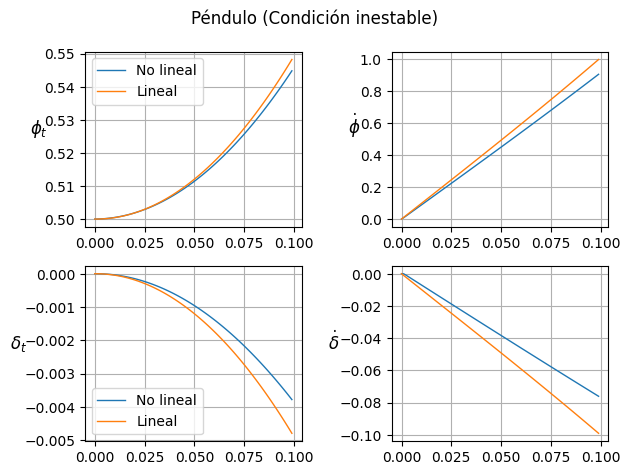

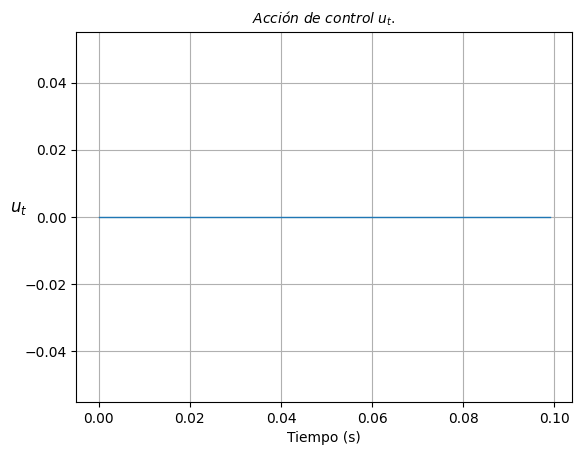

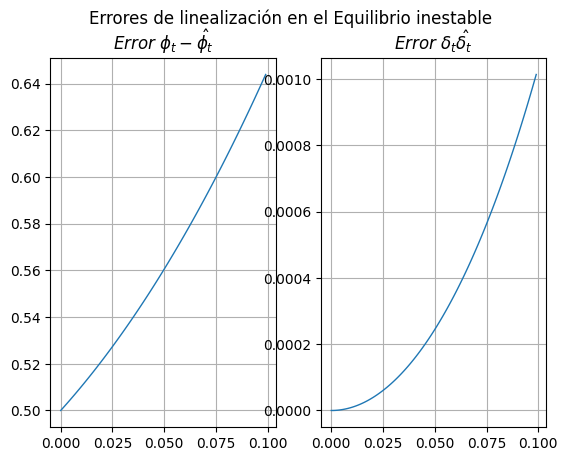

In [76]:

# Grafico cada una de las respuestas.

fig, axs = plt.subplots(2,2)
fig.suptitle('Péndulo (Condición inestable)')
axs[0,0].plot(t, ang, linewidth =1.0)
axs[0,0].plot(t, X[2,:], linewidth =1.0)
axs[0,0].legend(["No lineal","Lineal"])
axs[0,0].grid( True )
axs[0,0].set_ylabel('$\phi_t$',rotation=0, fontsize=12)
axs[0,1].plot(t, ang_p, linewidth =1.0)
axs[0,1].plot(t, X[3,:], linewidth =1.0)
axs[0,1].set_ylabel('$\dot{\phi}$',rotation=0, fontsize=12)
axs[0,1].grid( True )

axs[1,0].plot(t, delta, linewidth =1.0)
axs[1,0].plot(t, X[0,:], linewidth =1.0)
axs[1,0].legend(["No lineal","Lineal"])
axs[1,0].grid( True )
axs[1,0].set_ylabel('$\delta_t$',rotation=0, fontsize=12)
axs[1,1].plot(t, delta_p, linewidth =1.0)
axs[1,1].plot(t, X[1,:], linewidth =1.0)
axs[1,1].set_ylabel('$\dot{\delta}$',rotation=0, fontsize=12)
axs[1,1].grid( True )

fig.tight_layout()
#Acción de control
fig, ax1 = plt.subplots()
plt.plot(t, u, linewidth =1.0)
plt.grid( True )
ax1.set_ylabel('$u_t$',rotation=0, fontsize=12)
ax1.set_xlabel('Tiempo (s)')
ax1.set_title('$Acción\ de\ control\ u_t.$', fontsize=10)

fig2, axs2 = plt.subplots(1,2)
fig2.suptitle('Errores de linealización en el Equilibrio inestable')
axs2[0].plot(t, ang-X[1,:], linewidth =1.0)
axs2[0].grid( True )
axs2[0].set_title('$Error\ \phi_t-\hat{\phi_t}$',rotation=0, fontsize=12)
axs2[1].plot(t, delta-X[0,:], linewidth =1.0)
axs2[1].set_title('$Error\ \delta_t\hat{\delta_t}$',rotation=0, fontsize=12)
axs2[1].grid( True )

# **Linealización en el equilibrio estable**

Para el caso de la linealización de sistemas dinámicos, como el péndulo en su equilibrio **estable**, se puede linealizar aplicando Taylor a las ecuaciones cuando $\phi \approx π$



<!-- $(M+m)\cdot\ddot{\delta} = u- m\cdot long \cdot \ddot{\phi} + m\cdot long \cdot \dot{\phi}^2 \cdot (\pi-\phi) -Fricc\cdot \dot{\delta}$,
$Long \cdot \ddot{\phi} = g \cdot \phi - \ddot{\delta}$ -->
$\begin{equation*}
\begin{cases}
(M+m)\cdot\ddot{\delta} = u- m\cdot long \cdot \ddot{\phi} - m\cdot long \cdot \dot{\phi}^2 \cdot (\pi-\phi) -Fricc\cdot \dot{\delta} \\
Long \cdot \ddot{\phi} = -g \cdot (\pi-\phi) - \ddot{\delta}
\end{cases}
\end{equation*}$

en el punto de operación $x=[ \delta,\dot{\delta},\phi,\dot{\phi}]^T$, valuado en $[0,0,\pi,0]^T$.
Primero se trata de despejar las funciones $\ddot{\delta}$ y $\ddot{\phi}$.


In [86]:
u

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [87]:
#fi, fi_p, fi_pp, p, p_p, p_pp, M, m, u, long, Fricc, g=symbols('fi fi_p fi_pp p p_p p_pp M m u long Fricc g')
del(p_pp,fi_pp,u)
p_pp,fi_pp,u = symbols('p_pp fi_pp u')
Eq1=Eq(p_pp-(1/(M+m))*(u+m*long*fi_pp+m*long*fi_p**2*(pi-fi)-Fricc*p_p),0)
#% fi_pp=(1/long)*(g*(fi)-p_pp); %Pequeños angulos para fi~0, sin(fi)~fi, cos(fi)~1
Eq2=Eq(fi_pp-(1/long)*(g*(pi-fi)+p_pp),0)
sol = solve((Eq1, Eq2),(p_pp, fi_pp))
# print(sol)
p_pp=sol[p_pp]
fi_pp=sol[fi_pp]
print('\np_pp final es\n')
display(p_pp)
print('\nfi_pp final es\n')
display(fi_pp)


p_pp final es



                  2                        2                   
-Fricc⋅pₚ - fi⋅fiₚ ⋅long⋅m - fi⋅g⋅m + π⋅fiₚ ⋅long⋅m + π⋅g⋅m + u
───────────────────────────────────────────────────────────────
                               M                               


fi_pp final es



                                   2                        2                 
-Fricc⋅pₚ - M⋅fi⋅g + π⋅M⋅g - fi⋅fiₚ ⋅long⋅m - fi⋅g⋅m + π⋅fiₚ ⋅long⋅m + π⋅g⋅m +
──────────────────────────────────────────────────────────────────────────────
                                     M⋅long                                   

  
 u
──
  

Así, para el equilibrio **estable**, ambas funciones son:

$\begin{equation*}
\begin{cases}
\ddot{\delta} = \dfrac{-Fricc \cdot \dot{\delta}+(\pi-\phi) \cdot {\dot{\delta}}^2\cdot long\cdot m +(\pi-\phi)\cdot g\cdot m+u}{M} \\
\ddot{\phi} = \dfrac{-Fricc \cdot \dot{\delta}+M \cdot (\pi-\phi) \cdot g+ (\pi-\phi) \cdot{\dot{\phi}}^2\cdot long\cdot m + (\pi-\phi)\cdot g\cdot m+u}{M\cdot long}
\end{cases}
\end{equation*}$


Ahora se procede a realizar las derivadas de las funciones $\ddot{\delta}$ y $\ddot{\phi}$ respecto de las cuatro variables, que son $\delta$, $\dot{\delta}$, $\phi$, y $\ddot{\phi}$.
Se emplea la función diff() y al resultado se lo valúa en el punto de operación mediante la indicación de cada uno con la operación .subs().

In [89]:
Mat_A2=Matrix([[0,1,0,0],
  [diff(p_pp, p).subs({p:0,p_p:0,fi:0,fi_p:0}),
  diff(p_pp, p_p).subs({p:0,p_p:0,fi:0,fi_p:0}),
  diff(p_pp, fi).subs({p:0,p_p:0,fi:0,fi_p:0}),
  diff(p_pp, fi_p).subs({p:0,p_p:0,fi:0,fi_p:0})],
  [0,0,0,1],
  [diff(fi_pp, p).subs({p:0,p_p:0,fi:0,fi_p:0}),
  diff(fi_pp, p_p).subs({p:0,p_p:0,fi:0,fi_p:0}),
  diff(fi_pp, fi).subs({p:0,p_p:0,fi:0,fi_p:0}),
  diff(fi_pp, fi_p).subs({p:0,p_p:0,fi:0,fi_p:0})]])

Mat_B2=Matrix([[0],
 [diff(p_pp, u).subs({p:0,p_p:0,fi:0,fi_p:0})],
 [0],
[diff(fi_pp, u).subs({p:0,p_p:0,fi:0,fi_p:0})]])
print('Para el caso estable')
print('Mat_A\n:')
display(Mat_A2)
print('\nMat_B\n')

display(Mat_B2)

Para el caso estable
Mat_A
:


⎡0     1         0       0⎤
⎢                         ⎥
⎢   -Fricc     -g⋅m       ⎥
⎢0  ───────    ─────     0⎥
⎢      M         M        ⎥
⎢                         ⎥
⎢0     0         0       1⎥
⎢                         ⎥
⎢   -Fricc   -M⋅g - g⋅m   ⎥
⎢0  ───────  ──────────  0⎥
⎣    M⋅long    M⋅long     ⎦


Mat_B



⎡  0   ⎤
⎢      ⎥
⎢  1   ⎥
⎢  ─   ⎥
⎢  M   ⎥
⎢      ⎥
⎢  0   ⎥
⎢      ⎥
⎢  1   ⎥
⎢──────⎥
⎣M⋅long⎦

In [90]:
# Remplazo los valores en cada matriz de estado

Mat_a2 = Mat_A2.subs({m:.1,Fricc:0.1, long:.6,g:9.8,M:.5})
Mat_b2 = Mat_B2.subs({m:.1,Fricc:0.1, long:.6,g:9.8,M:.5})

# Muestro en la consola las matrices
print('\n Matriz A: \n')
display(Mat_a2)
print('\n Matriz B: \n')
display(Mat_b2)


 Matriz A: 



⎡0          1             0    0⎤
⎢                               ⎥
⎢0         -0.2         -1.96  0⎥
⎢                               ⎥
⎢0          0             0    1⎥
⎢                               ⎥
⎣0  -0.333333333333333  -19.6  0⎦


 Matriz B: 



⎡       0        ⎤
⎢                ⎥
⎢      2.0       ⎥
⎢                ⎥
⎢       0        ⎥
⎢                ⎥
⎣3.33333333333333⎦

# **Simulación numérica para el equilibrio estable**

In [91]:
# Combierto las matrices de estado desde el tipo simbolico a numpy array.
# se debe implementar el método "astype" y definir que se quiere que los números
# sean flotantes. De otra manera tratara a la matriz como objeto.

A2 = np.array(Mat_a).astype(np.float64)
B2 = np.array(Mat_b).astype(np.float64)

In [97]:
del (delta, delta_p,ang,ang_p) # borro las variables que vuelvo a crear
#Paso de simulación
h=10e-4;
# Tiempo de simulación
t_simul=0.1;

##%Versión linealizada en el equilibrio inestable. Sontag Pp 104.
# Matrices de estado
Mat_C=np.array([[1., 0., 0., 0.]]) #La salida es posición

# Inicialización de vectores.
# Doy valor a los parametros
mc=.1;Friccc=0.1; longc=.6;gc=9.8;Mc=.5

#Valores iniciales
delta, delta_p,ang,ang_p = np.array([0]),np.array([0]),np.array([.5]),np.array([0]),
uc = np.array([0])

# inicializo vecotes aceleración
delta_pp = np.empty((1,0),float)
ang_pp = np.array([0])

estado=[[delta[0]],   [delta_p[0]], [ang[0]], [ang_p[0]]]

#Creo el vector de estados derivados con ninguna asignación
Xp = np.empty((4,0),float)

X= np.reshape(np.array(estado),(4,1)) #Igual condiciones inicial es del sistema lineal
t = [0]
for ii in range(int(t_simul/h)-1):
   # y[ii]=np.matmul(Mat_C,estado)[0][0] # Mat_C @ estado
    uc= np.append(uc,0)

    #Calculo de las variables de estado
    Xp_aux = np.reshape(A @ X[:,-1],(4,1)) + B*uc[-1]

    Xp =  np.append(Xp, Xp_aux, axis=1)

    X_aux = np.reshape(X[:,-1],(4,1)) + np.reshape(h*Xp[:,-1],(4,1))
    X =   np.append(X, X_aux, axis=1)

    # Planteo las ecuaciones no lineales numericamente
      # _aux indica una asignación auxiliar, para luego incorporar el valor al vector definitivo
    delta_pp_aux =  (1/(Mc+mc))*(uc[-1]-mc*longc*ang_pp[-1]*np.cos(ang[-1])+mc*longc*ang_p[-1]**2*np.sin(ang[-1])-Friccc*delta_p[-1])
    delta_pp= np.append(delta_pp,delta_pp_aux)

    ang_pp_aux =(1/longc)*(gc*np.sin(ang[-1])-delta_pp[-1]*np.cos(ang[-1]))
    ang_pp = np.append(ang_pp,ang_pp_aux)

    #Integro numericamente cada variable (Caso No Lineal)
      #Velocidad
    delta_p_aux  =delta_p[-1]+h*delta_pp[-1]
    delta_p = np.append(delta_p,delta_p_aux)
    delta_aux    =delta[-1]+h*delta_p[-1]
    delta = np.append(delta,delta_aux)

    ang_p_aux = ang_p[-1]+ h* ang_pp[-1]
    ang_p = np.append(ang_p,ang_p_aux)

    ang_aux = ang[-1]+h*ang_p[-1]
    ang = np.append(ang,ang_aux)

    #p_O[ii+1]=x_hat[0][0] #El vector inicia en 0, en Octave en 1
    #fi_O[ii+1]=x_hat[2][0]
    t.append(t[-1]+h)


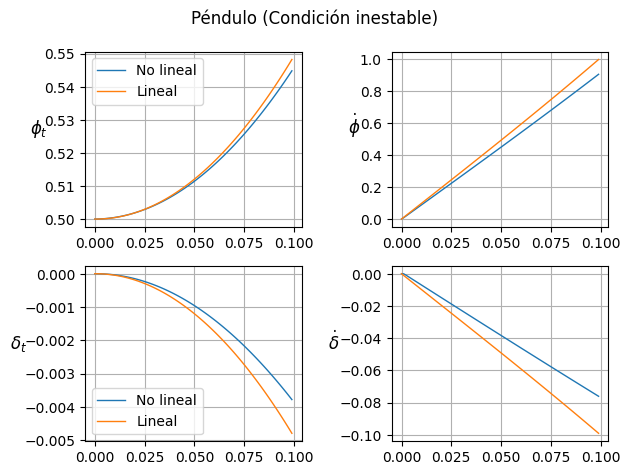

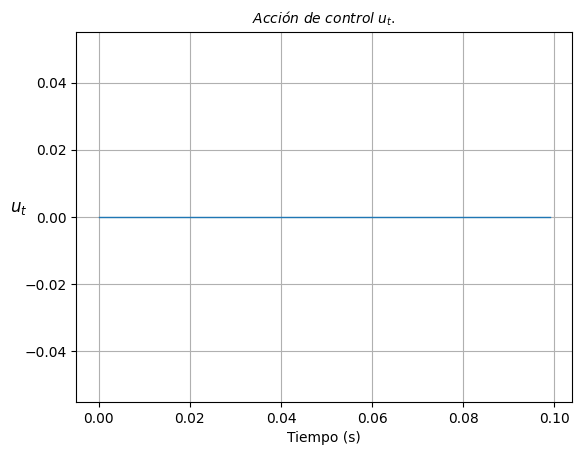

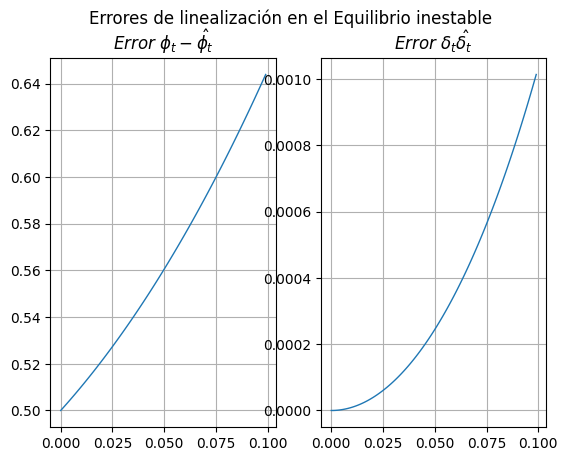

In [98]:
# Grafico cada una de las respuestas.

fig, axs = plt.subplots(2,2)
fig.suptitle('Péndulo (Condición inestable)')
axs[0,0].plot(t, ang, linewidth =1.0)
axs[0,0].plot(t, X[2,:], linewidth =1.0)
axs[0,0].legend(["No lineal","Lineal"])
axs[0,0].grid( True )
axs[0,0].set_ylabel('$\phi_t$',rotation=0, fontsize=12)
axs[0,1].plot(t, ang_p, linewidth =1.0)
axs[0,1].plot(t, X[3,:], linewidth =1.0)
axs[0,1].set_ylabel('$\dot{\phi}$',rotation=0, fontsize=12)
axs[0,1].grid( True )

axs[1,0].plot(t, delta, linewidth =1.0)
axs[1,0].plot(t, X[0,:], linewidth =1.0)
axs[1,0].legend(["No lineal","Lineal"])
axs[1,0].grid( True )
axs[1,0].set_ylabel('$\delta_t$',rotation=0, fontsize=12)
axs[1,1].plot(t, delta_p, linewidth =1.0)
axs[1,1].plot(t, X[1,:], linewidth =1.0)
axs[1,1].set_ylabel('$\dot{\delta}$',rotation=0, fontsize=12)
axs[1,1].grid( True )

fig.tight_layout()
#Acción de control
fig, ax1 = plt.subplots()
plt.plot(t, uc, linewidth =1.0)
plt.grid( True )
ax1.set_ylabel('$u_t$',rotation=0, fontsize=12)
ax1.set_xlabel('Tiempo (s)')
ax1.set_title('$Acción\ de\ control\ u_t.$', fontsize=10)

fig2, axs2 = plt.subplots(1,2)
fig2.suptitle('Errores de linealización en el Equilibrio inestable')
axs2[0].plot(t, ang-X[1,:], linewidth =1.0)
axs2[0].grid( True )
axs2[0].set_title('$Error\ \phi_t-\hat{\phi_t}$',rotation=0, fontsize=12)
axs2[1].plot(t, delta-X[0,:], linewidth =1.0)
axs2[1].set_title('$Error\ \delta_t\hat{\delta_t}$',rotation=0, fontsize=12)
axs2[1].grid( True )